In [ ]:
# Callin Switzer
# 16 July 2019
# Analyze data from photogate

In [1]:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import serial
import re
import csv
import seaborn as sns
import warnings
import sys
import os
from datetime import datetime
import msvcrt
import winsound

In [2]:
%matplotlib inline
print(sys.version)
print(sys.executable)

# define directories
baseDir = os.getcwd()

# may want to make this directory somewhere else, if dropbox becomes a problem
dataDir = r"C:\Users\cswitzer.BEES\Desktop\MonarchSensor"
if not os.path.isdir(dataDir):
    os.mkdir(dataDir)

figDir = r"C:\Users\cswitzer.BEES\Desktop\MonarchFigs"
if not os.path.isdir(figDir):
    os.mkdir(figDir)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
C:\Anaconda3\envs\photogate\python.exe


In [3]:
# read in data
dfile = os.path.join(dataDir,"2019_07_22__14_42_31_732636.csv")
df1 = pd.read_csv(dfile)
df1.head()

,A0,A1,datetime
0,114,116,2019-07-22 14:42:31.735629
1,116,113,2019-07-22 14:42:31.738628
2,115,113,2019-07-22 14:42:31.741612
3,117,113,2019-07-22 14:42:31.743632
4,113,112,2019-07-22 14:42:31.745626


In [4]:
df1['datetime']= pd.to_datetime(df1['datetime']) 

C:\Anaconda3\envs\photogate\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


(0, 600)

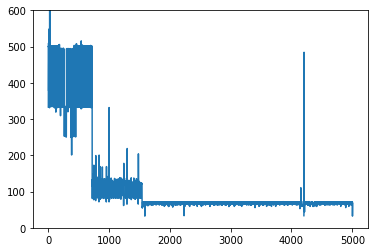

In [5]:
# plot sampling frequency
sampSec = np.diff(df1.datetime)
sampSec = sampSec / np.timedelta64(1, 's')
plt.plot(1/sampSec)
plt.ylim([0, 600])

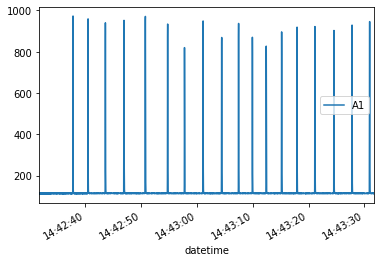

In [6]:
df1.plot(x = "datetime", y = "A1")
plt.show()

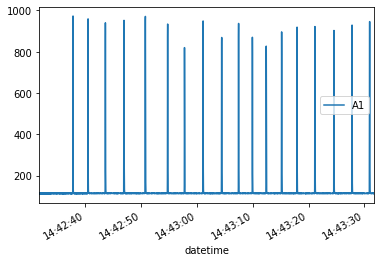

In [7]:
df1.plot(x = "datetime", y = "A1")
plt.show()

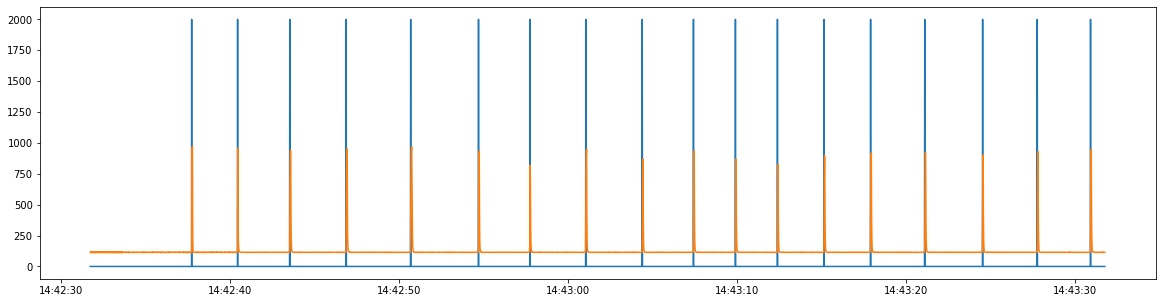

In [8]:
# calculate rising edge of data
dataMidpoint = (np.max(df1.A1) + np.min(df1.A1)) / 2
signalStarts = np.hstack([np.diff((df1.A1 > dataMidpoint)*1.0) > 0 *1.0,0])
plt.figure(figsize = [20, 5])
plt.plot(df1.datetime, signalStarts*2000)
plt.plot(df1.datetime, df1.A1)


In [9]:
# find time between peaks
timddiffs = np.diff(df1.datetime[signalStarts == 1])

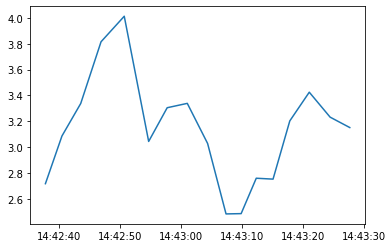

In [16]:
seconds = timddiffs / np.timedelta64(1, 's')
plt.plot((df1.datetime[signalStarts == 1][0:len(seconds)]), seconds)

In [17]:
# the whole dataset can be compressed to this: 
df1.datetime[signalStarts == 1]

1211   2019-07-22 14:42:37.731532
1537   2019-07-22 14:42:40.447933
1745   2019-07-22 14:42:43.533323
1971   2019-07-22 14:42:46.870353
2229   2019-07-22 14:42:50.684983
2501   2019-07-22 14:42:54.697274
2707   2019-07-22 14:42:57.740598
2931   2019-07-22 14:43:01.044865
3157   2019-07-22 14:43:04.382856
3363   2019-07-22 14:43:07.410486
3531   2019-07-22 14:43:09.892904
3700   2019-07-22 14:43:12.377549
3888   2019-07-22 14:43:15.136170
4076   2019-07-22 14:43:17.887813
4291   2019-07-22 14:43:21.089929
4519   2019-07-22 14:43:24.514334
4738   2019-07-22 14:43:27.745664
4951   2019-07-22 14:43:30.896439
Name: datetime, dtype: datetime64[ns]